In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import yfinance as yf
import requests
from bs4 import BeautifulSoup

from arch import arch_model

import statistics as stat
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pmdarima import auto_arima


**Imported closing daily interest rates of the 6 active benchmarks of US Treasury yields, for the months of October 2019 and November 2019**

In [2]:
url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2019'

r = requests.get(url)
html = r.text

soup = BeautifulSoup(html)
table = soup.find('table', {"class": "t-chart"})
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

result = pd.DataFrame(data, columns=['Date', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'], dtype=float)

In [3]:
date_mask = (result['Date'] > '09/30/2019') & (result['Date'] <= '11/30/2019')
dfRates = result.loc[date_mask, ['Date', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr']]
dfRates.reset_index(inplace=True, drop = True)
print(dfRates.head())

       Date  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  30 Yr
0  10/01/19  1.56  1.51  1.51  1.59   1.65   2.11
1  10/02/19  1.48  1.43  1.43  1.53   1.60   2.09
2  10/03/19  1.39  1.34  1.34  1.45   1.54   2.04
3  10/04/19  1.40  1.35  1.34  1.43   1.52   2.01
4  10/07/19  1.46  1.41  1.38  1.47   1.56   2.05


**Average yield for each benchmark security**

In [4]:
month = 'October'
two_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '2 Yr'])
print ("Average 2 Yr yield in {} = ".format(month) + "{0:0.3f}".format(two_yr_oct_avg))
three_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '3 Yr'])
print ("Average 3 Yr yield in {} = ".format(month) + "{0:0.3f}".format(three_yr_oct_avg))
five_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '5 Yr'])
print ("Average 5 Yr yield in {} = ".format(month) + "{0:0.3f}".format(five_yr_oct_avg))
seven_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '7 Yr'])
print ("Average 7 Yr yield in {} = ".format(month) + "{0:0.3F}".format(seven_yr_oct_avg))
ten_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '10 Yr'])
print ("Average 10 Yr yield in {} = ".format(month) + "{0:0.3F}".format(ten_yr_oct_avg))
thirty_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '30 Yr'])
print ("Average 30 Yr yield in {} = ".format(month) + "{0:0.3F}".format(thirty_yr_oct_avg))

Average 2 Yr yield in October = 1.551
Average 3 Yr yield in October = 1.528
Average 5 Yr yield in October = 1.525
Average 7 Yr yield in October = 1.615
Average 10 Yr yield in October = 1.707
Average 30 Yr yield in October = 2.190


In [5]:
month = 'November'
two_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '2 Yr'])
print ("Average 2 Yr yield in {} = ".format(month) + "{0:0.3f}".format(two_yr_oct_avg))
three_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '3 Yr'])
print ("Average 3 Yr yield in {} = ".format(month) + "{0:0.3f}".format(three_yr_oct_avg))
five_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '5 Yr'])
print ("Average 5 Yr yield in {} = ".format(month) + "{0:0.3f}".format(five_yr_oct_avg))
seven_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '7 Yr'])
print ("Average 7 Yr yield in {} = ".format(month) + "{0:0.3F}".format(seven_yr_oct_avg))
ten_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '10 Yr'])
print ("Average 10 Yr yield in {} = ".format(month) + "{0:0.3F}".format(ten_yr_oct_avg))
thirty_yr_oct_avg = stat.mean(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '30 Yr'])
print ("Average 30 Yr yield in {} = ".format(month) + "{0:0.3F}".format(thirty_yr_oct_avg))

Average 2 Yr yield in November = 1.613
Average 3 Yr yield in November = 1.612
Average 5 Yr yield in November = 1.639
Average 7 Yr yield in November = 1.736
Average 10 Yr yield in November = 1.812
Average 30 Yr yield in November = 2.281


**Standard deviation for each benchmark security**

In [6]:
month = 'October'
two_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '2 Yr'])
print ("Standard deviation of 2 Yr yield in {} = ".format(month) + "{0:0.3f}".format(two_yr_oct_stdev))
three_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '3 Yr'])
print ("Standard deviation of 3 Yr yield in {} = ".format(month) + "{0:0.3f}".format(three_yr_oct_stdev))
five_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '5 Yr'])
print ("Standard deviation of 5 Yr yield in {} = ".format(month) + "{0:0.3f}".format(five_yr_oct_stdev))
seven_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '7 Yr'])
print ("Standard deviation of 7 Yr yield in {} = ".format(month) + "{0:0.3F}".format(seven_yr_oct_stdev))
ten_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '10 Yr'])
print ("Standard deviation of 10 Yr yield in {} = ".format(month) + "{0:0.3F}".format(ten_yr_oct_stdev))
thirty_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 10, '30 Yr'])
print ("Standard deviation of 30 Yr yield in {} = ".format(month) + "{0:0.3F}".format(thirty_yr_oct_stdev))


Standard deviation of 2 Yr yield in October = 0.080
Standard deviation of 3 Yr yield in October = 0.096
Standard deviation of 5 Yr yield in October = 0.104
Standard deviation of 7 Yr yield in October = 0.101
Standard deviation of 10 Yr yield in October = 0.105
Standard deviation of 30 Yr yield in October = 0.101


In [7]:
month = 'November'
two_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '2 Yr'])
print ("Standard deviation of 2 Yr yield in {} = ".format(month) + "{0:0.3f}".format(two_yr_oct_stdev))
three_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '3 Yr'])
print ("Standard deviation of 3 Yr yield in {} = ".format(month) + "{0:0.3f}".format(three_yr_oct_stdev))
five_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '5 Yr'])
print ("Standard deviation of 5 Yr yield in {} = ".format(month) + "{0:0.3f}".format(five_yr_oct_stdev))
seven_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '7 Yr'])
print ("Standard deviation of 7 Yr yield in {} = ".format(month) + "{0:0.3F}".format(seven_yr_oct_stdev))
ten_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '10 Yr'])
print ("Standard deviation of 11 Yr yield in {} = ".format(month) + "{0:0.3F}".format(ten_yr_oct_stdev))
thirty_yr_oct_stdev = stat.stdev(dfRates.loc[pd.to_datetime(dfRates['Date']).dt.month == 11, '30 Yr'])
print ("Standard deviation of 30 Yr yield in {} = ".format(month) + "{0:0.3F}".format(thirty_yr_oct_stdev))

Standard deviation of 2 Yr yield in November = 0.034
Standard deviation of 3 Yr yield in November = 0.044
Standard deviation of 5 Yr yield in November = 0.053
Standard deviation of 7 Yr yield in November = 0.061
Standard deviation of 11 Yr yield in November = 0.065
Standard deviation of 30 Yr yield in November = 0.077


**Graphing the 6 benchmark securities for the 2 months on 1 plot**

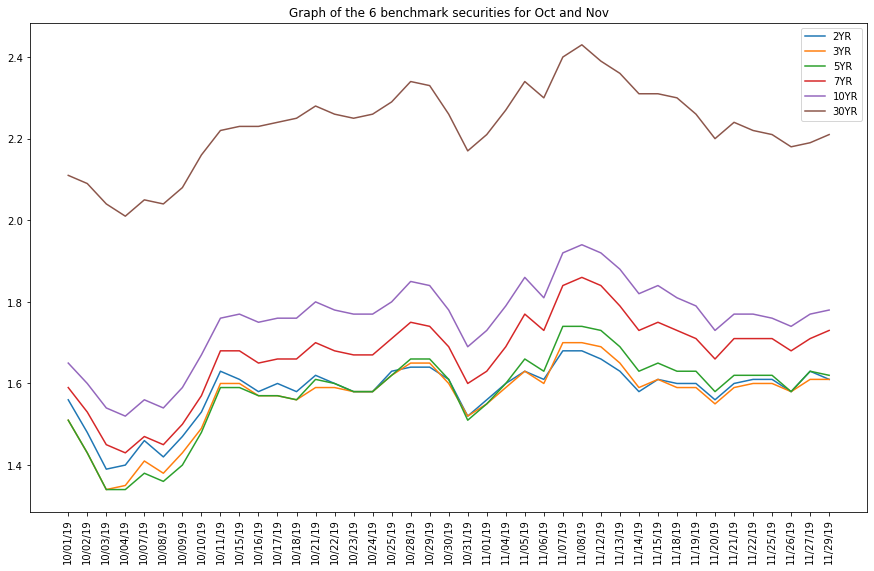

In [8]:
plt.figure(figsize=(15,9))
plt.plot(dfRates['Date'], dfRates['2 Yr'], label = "2YR")
plt.plot(dfRates['Date'], dfRates['3 Yr'], label = "3YR")
plt.plot(dfRates['Date'], dfRates['5 Yr'], label = "5YR")
plt.plot(dfRates['Date'], dfRates['7 Yr'], label = "7YR")
plt.plot(dfRates['Date'], dfRates['10 Yr'], label = "10YR")
plt.plot(dfRates['Date'], dfRates['30 Yr'], label = "30YR")
plt.legend()
plt.title('Graph of the 6 benchmark securities for Oct and Nov')
plt.xticks(rotation=90)
plt.show()

### Using <font color="blue">Nelson-Siegel </font> and <font color="orange">Nelson-Siegel-Svensson</font> to fit the Yield Curve

We have illustrated both the Nelson-Siegel and the Nelson-Siegel-Svensson methods and computed the parameters for both the methods.

However, we will be comparing October and November with respect to the Nelson-Seigel method only.


The Nelson-Siegel equation is:
    r(t)=b0+b1*exp(−τλ)+b2[(τλ)*exp(−τλ)]

* b0 is interpreted as the long term levels of interest rates
* b1 is the short-term component. It can also be interpreted as the slope of the curve. This starts at 1, and decays monotonically (without any rise in between)  to 0.
* b2 is the medium-term component. This relates to the curvature of the term structure. This part starts at 0, increases, then decays to zero.
* τ is the decay factor
* λ denotes how much b1 and b2 factors contribute to the yield curve relative to the level factor

In [9]:
dfRates1 = dfRates
dfRates1['Date'] = pd.to_datetime(dfRates1['Date'])
dfRates1.set_index('Date', inplace=True)
print(dfRates1.tail())

            2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  30 Yr
Date                                            
2019-11-22  1.61  1.60  1.62  1.71   1.77   2.22
2019-11-25  1.61  1.60  1.62  1.71   1.76   2.21
2019-11-26  1.58  1.58  1.58  1.68   1.74   2.18
2019-11-27  1.63  1.61  1.63  1.71   1.77   2.19
2019-11-29  1.61  1.61  1.62  1.73   1.78   2.21


In [10]:
# Dividing the data set into October and November
OctoberRates = dfRates1['2019-10-01':'2019-10-31']
NovemberRates = dfRates1['2019-11-01':]
print('OctoberRates', OctoberRates.shape)
print('NovemberRates', NovemberRates.shape)

OctoberRates (22, 6)
NovemberRates (19, 6)


### October

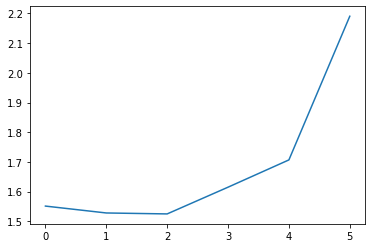

In [11]:
MeanRates_Oct = OctoberRates.mean()

#converting DataFrame to List
MeanRatesArray_Oct = MeanRates_Oct.tolist()

#converting List to np array
MeanRatesArray_Oct = np.array(MeanRatesArray_Oct).astype('float32')

plt.plot(MeanRatesArray_Oct)
plt.show()

In [12]:
#Now, using the nelson_siegel_svensson package to curve fit the above yield curve
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols

In [13]:
#tenors
t = np.array([2.0, 3.0, 5.0, 7.0, 10.0, 30.0])
y = MeanRatesArray_Oct
curve_fit_NS, statusNS = calibrate_ns_ols(t,y) #NS model calibrate
curve_fit_NSS, statusNSS = calibrate_nss_ols(t,y) #NSS model calibrate
print(curve_fit_NS)
print(curve_fit_NSS)

NelsonSiegelCurve(beta0=2.534915349020139, beta1=-0.8131504396642784, beta2=-1.8864995310211328, tau=3.8431232392482406)
NelsonSiegelSvenssonCurve(beta0=690.633291764175, beta1=-688.8324398913538, beta2=-237.9731503152433, beta3=-1691.8639251798288, tau1=10.83599597795783, tau2=40.277925360787044)


October parameters:

| NelsonSiegelCurve | NelsonSiegelSvenssonCurve |
| :- | :- |
| beta0=2.5349153076726076 |beta0=143.00999160911365 |
| beta1=-0.8131503364670667 | beta1=-141.19778675807316 |
| beta2=-1.886499657447207 | beta2=-57.59154970470409 |
| NA | beta3=-356.6968376174367 |
| tau=3.8431227648574255 | tau1=7.261131055187684 |
| NA |  tau2=29.879555506066648 |

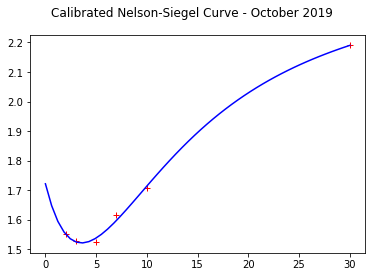

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Calibrated Nelson-Siegel Curve - October 2019')
ax.plot(t, y, 'r+');
t2 = np.linspace(0, 30)
ax.plot(t2, curve_fit_NS(t2), 'b-')

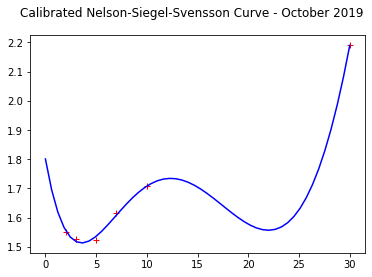

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Calibrated Nelson-Siegel-Svensson Curve - October 2019')
ax.plot(t, y, 'r+');
t2 = np.linspace(0, 30)
ax.plot(t2, curve_fit_NSS(t2), 'b-')

### November

In [16]:
NovemberRates.head()

,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
Date,,,,,,
2019-11-01,1.56,1.55,1.55,1.63,1.73,2.21
2019-11-04,1.60,1.59,1.60,1.69,1.79,2.27
2019-11-05,1.63,1.63,1.66,1.77,1.86,2.34
2019-11-06,1.61,1.60,1.63,1.73,1.81,2.30
2019-11-07,1.68,1.70,1.74,1.84,1.92,2.40


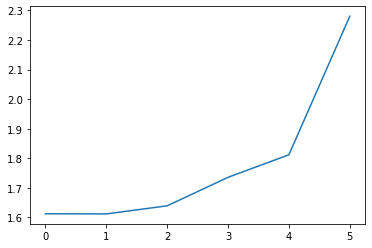

In [17]:
#converting DataFrame to List
MeanRatesArray_Nov1 = NovemberRates.mean().tolist()

#converting List to np array
MeanRatesArray_Nov = np.array(MeanRatesArray_Nov1).astype('float32') 

plt.plot(MeanRatesArray_Nov)
plt.show()

In [18]:
tNov = np.array([2.0,3.0,5.0,7.0,10.0,30.0])
yNov = MeanRatesArray_Nov

curve_fit_NS_nov, status1 = calibrate_ns_ols(tNov,yNov) #NS model calibrate
curve_fit_NSS_nov, status = calibrate_nss_ols(tNov,yNov) #NSS model calibrate

print(curve_fit_NS_nov)
print(curve_fit_NSS_nov)

NelsonSiegelCurve(beta0=2.654783819013999, beta1=-0.9992534010715902, beta2=-1.4350018842104069, tau=4.654237383117666)
NelsonSiegelSvenssonCurve(beta0=1479.346725600233, beta1=-1477.5630338479941, beta2=-475.9648303791971, beta3=-3578.588651108672, tau1=13.073833930056072, tau2=46.53221648456477)


November parameters:

| NelsonSiegelCurve | NelsonSiegelSvenssonCurve |
| :- | :- |
| beta0=2.654783819013999 |beta0=1231.0184352450142 |
| beta1=-0.9992542345437765  | beta1=-1229.2300510035288 |
| beta2=-1.4350009029844557  | beta2=-401.3649172913892 |
| NA | beta3=-2987.235082747396 |
| tau=4.654243606399687 | tau1=12.375189645015299 |
| NA |  tau2=44.45236783655436 |




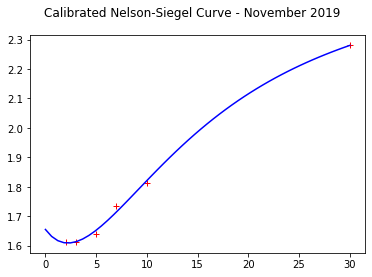

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Calibrated Nelson-Siegel Curve - November 2019')
ax.plot(tNov, yNov, 'r+');
t2 = np.linspace(0, 30)
ax.plot(t2, curve_fit_NS_nov(t2), 'b-')

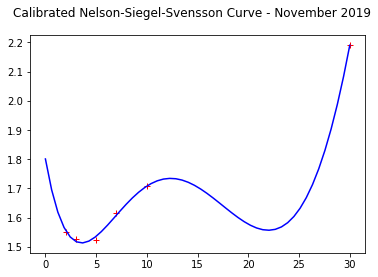

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Calibrated Nelson-Siegel-Svensson Curve - November 2019')
ax.plot(t, y, 'r+');
t2 = np.linspace(0, 30)
ax.plot(t2, curve_fit_NSS(t2), 'b-')

**What are the significant changes between October and November?**


| NelsonSiegelCurve October | NelsonSiegelCurve November |
| :- | :- |
| beta0=2.5349153076726076 | beta0=2.654783819013999 |
| beta1=-0.8131503364670667 | beta1=-0.9992542345437765  |
| beta2=-1.886499657447207 | beta2=-1.4350009029844557  |
| tau=3.8431227648574255 | tau=4.654243606399687 |


We will analyze the changes in the Nelson-Seigel paramters from the month of October to the month of November

- The long run levels of interest rates is higher for November at 2.654 whereas it was 2.53 in October
- The beta 1 represent the slope of the term structure. Here it is -ve, which means the curve is upward sloping. In absolute terms, we can see that the slope has increased. 
- The beta 2 represents the curvature aspect. Its absolute value has reduced.
- Decay factor has increased